In [268]:
data = """seeds: 79 14 55 13

seed-to-soil map:
50 98 2
52 50 48

soil-to-fertilizer map:
0 15 37
37 52 2
39 0 15

fertilizer-to-water map:
49 53 8
0 11 42
42 0 7
57 7 4

water-to-light map:
88 18 7
18 25 70

light-to-temperature map:
45 77 23
81 45 19
68 64 13

temperature-to-humidity map:
0 69 1
1 0 69

humidity-to-location map:
60 56 37
56 93 4"""

In [269]:
# with open(f'05.txt', 'r') as file:
#     data = file.read().strip()

In [270]:
seeds = data.split('\n\n')[0].split(': ')[-1].split()
seeds = [int(seed) for seed in seeds]

maps = data.split('\n\n')[1:]
maps = [item.split(':\n')[1] for item in maps]
maps = [item.split('\n') for item in maps]
maps = [[item.split() for item in map] for map in maps]
maps = [[[int(number) for number in item] for item in map] for map in maps]

In [271]:
def get_destination(number):
    for map in maps:
        for row in map:
            # imagining it flows left to right
            right_start, left_start, length = row
            if number in range(left_start, left_start+length):
                number = number - left_start + right_start
                break
    return number


min_lowest_location = None
for seed in seeds:
    location = get_destination(seed)
    if not min_lowest_location or location < min_lowest_location:
        min_lowest_location = location

# puzzle 1
min_lowest_location

35

In [272]:
from itertools import batched

seed_bands = [[start, start+count-1] for start, count in batched(seeds, 2)]

In [273]:
# seed -> destination (too slow, commented)

# seed_bands = [range(start, start+count-1) for start, count in batched(seeds, 2)]
# 
# min_lowest_location = None
# for seed_band in seed_bands:
#     for seed in seed_band:
#         location = get_destination(seed)
#         if not min_lowest_location or location < min_lowest_location:
#             min_lowest_location = location
# 
# min_lowest_location

In [274]:
def get_seed(number):
    for map in maps[::-1]:
        for row in map:
        # imagining it flows right to left
            right_start, left_start, length = row
            if number in range(right_start, right_start+length):
                number = number - right_start + left_start
                break
    return number

In [275]:
# destination -> seed

seed_bands = [range(start, start+count-1) for start, count in batched(seeds, 2)]


tentative = 0
while True:
    location = get_seed(tentative)
    if any([location in band for band in seed_bands]):
        break
    tentative += 1

tentative

46

In [276]:
def get_path(number):
    path = [number]
    for map in maps:
        for row in map:
            # imagining it flows left to right
            right_start, left_start, length = row
            if number in range(left_start, left_start+length):
                number = number - left_start + right_start
                break
        path.append(number)
    return path

paths = []
for band in seed_bands:
    for seed in band:
        paths.append(get_path(seed))

for item in paths:
    print(item)

min([item[-1] for item in paths])

[79, 81, 81, 81, 74, 78, 78, 82]
[80, 82, 82, 82, 75, 79, 79, 83]
[81, 83, 83, 83, 76, 80, 80, 84]
[82, 84, 84, 84, 77, 45, 46, 46]
[83, 85, 85, 85, 78, 46, 47, 47]
[84, 86, 86, 86, 79, 47, 48, 48]
[85, 87, 87, 87, 80, 48, 49, 49]
[86, 88, 88, 88, 81, 49, 50, 50]
[87, 89, 89, 89, 82, 50, 51, 51]
[88, 90, 90, 90, 83, 51, 52, 52]
[89, 91, 91, 91, 84, 52, 53, 53]
[90, 92, 92, 92, 85, 53, 54, 54]
[91, 93, 93, 93, 86, 54, 55, 55]
[55, 57, 57, 53, 46, 82, 82, 86]
[56, 58, 58, 54, 47, 83, 83, 87]
[57, 59, 59, 55, 48, 84, 84, 88]
[58, 60, 60, 56, 49, 85, 85, 89]
[59, 61, 61, 61, 54, 90, 90, 94]
[60, 62, 62, 62, 55, 91, 91, 95]
[61, 63, 63, 63, 56, 92, 92, 96]
[62, 64, 64, 64, 57, 93, 93, 56]
[63, 65, 65, 65, 58, 94, 94, 57]
[64, 66, 66, 66, 59, 95, 95, 58]
[65, 67, 67, 67, 60, 96, 96, 59]
[66, 68, 68, 68, 61, 97, 97, 97]


46

In [277]:
maps

[[[50, 98, 2], [52, 50, 48]],
 [[0, 15, 37], [37, 52, 2], [39, 0, 15]],
 [[49, 53, 8], [0, 11, 42], [42, 0, 7], [57, 7, 4]],
 [[88, 18, 7], [18, 25, 70]],
 [[45, 77, 23], [81, 45, 19], [68, 64, 13]],
 [[0, 69, 1], [1, 0, 69]],
 [[60, 56, 37], [56, 93, 4]]]

In [278]:
# horizontal
top = []
bottom = []
for index, map in enumerate(maps):
    row_top = []
    row_bottom = []
    for row in map:
        right_start, left_start, length = row
        row_top.append([left_start+length, right_start+length])
        row_bottom.append([left_start, right_start])
    top.append(row_top)
    bottom.append(row_bottom)

# vertical
right_values = []
left_values = []
for band in zip(bottom, top):
    band = list(zip(*band))
    right_temp = []
    left_temp = []
    for bottom_couple,top_couple in band:
        left, right = zip(bottom_couple,top_couple)
        right_temp.append(right)
        left_temp.append(left)
    right_values.append(right_temp)
    left_values.append(left_temp)


def flatten(lst):
    return [item for sublist in lst for item in (flatten(sublist) if isinstance(sublist, list) or isinstance(sublist, tuple) else [sublist])]


# horiz_bands
horiz_bands = [list(zip(sublist1, sublist2)) for sublist1, sublist2 in zip(left_values, right_values)]

# horiz_bands sorted
horiz_bands = [sorted(map, key=lambda x: x[0]) for map in horiz_bands]

# horiz_bands starting with 0 end ending with max_value
max_value = max(flatten(horiz_bands))
for map in horiz_bands:
    if map[0][0][0] != 0:
        map.insert(0, ((0, map[0][0][0]), (0, map[0][0][0])))
    if map[-1][0][-1] != max_value:
        map.append(((map[-1][0][-1], max_value), (map[-1][0][-1], max_value)))

In [279]:
for item in horiz_bands:
    print(item)

[((0, 50), (0, 50)), ((50, 98), (52, 100)), ((98, 100), (50, 52))]
[((0, 15), (39, 54)), ((15, 52), (0, 37)), ((52, 54), (37, 39)), ((54, 100), (54, 100))]
[((0, 7), (42, 49)), ((7, 11), (57, 61)), ((11, 53), (0, 42)), ((53, 61), (49, 57)), ((61, 100), (61, 100))]
[((0, 18), (0, 18)), ((18, 25), (88, 95)), ((25, 95), (18, 88)), ((95, 100), (95, 100))]
[((0, 45), (0, 45)), ((45, 64), (81, 100)), ((64, 77), (68, 81)), ((77, 100), (45, 68))]
[((0, 69), (1, 70)), ((69, 70), (0, 1)), ((70, 100), (70, 100))]
[((0, 56), (0, 56)), ((56, 93), (60, 97)), ((93, 97), (56, 60)), ((97, 100), (97, 100))]


In [280]:
initial_blocks = horiz_bands[0]
print(initial_blocks)

def get_tree(initial_block):
    start_range, end_range = initial_block
    return

for initial_block in initial_blocks:
    pass

[((0, 50), (0, 50)), ((50, 98), (52, 100)), ((98, 100), (50, 52))]


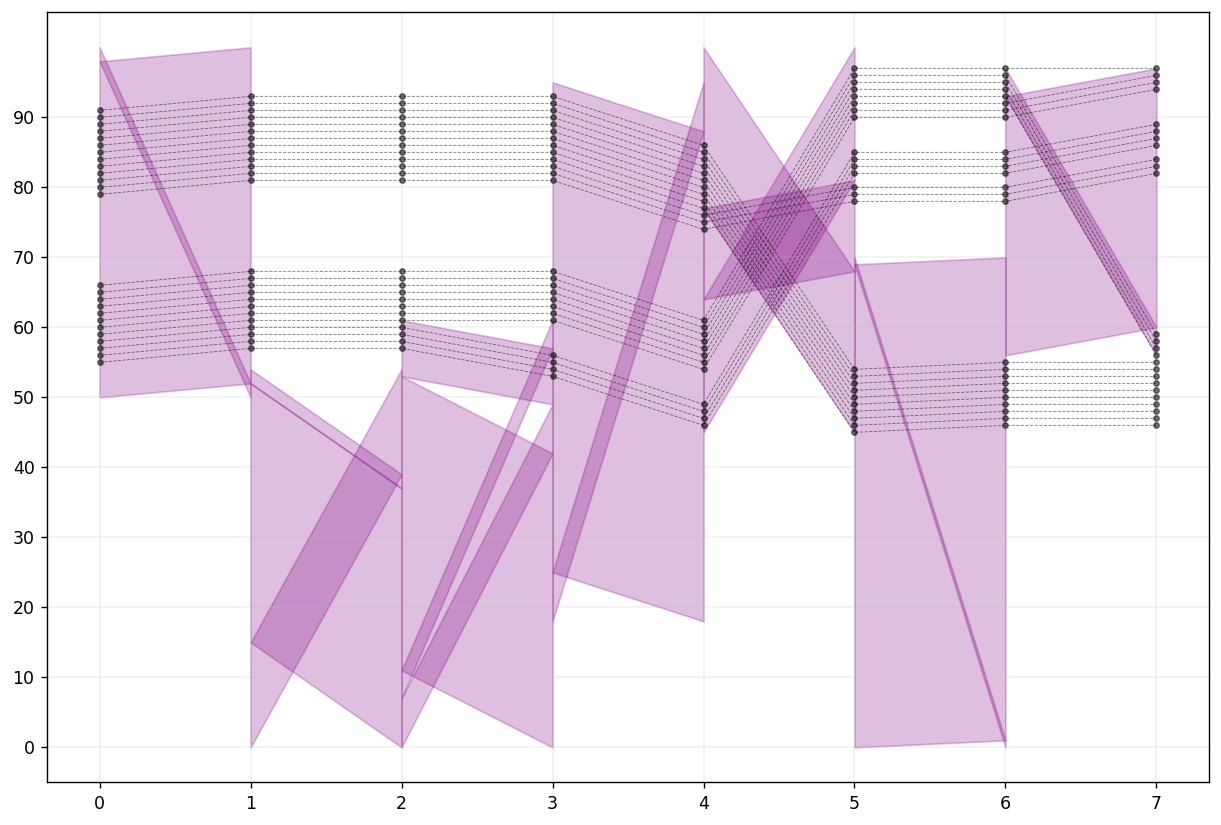

In [281]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12,8), dpi=125)

for path in paths:
    ax.plot(range(len(path)), path, c='black', ls='--', linewidth=0.5, marker='.', alpha=0.5)

for index, map in enumerate(maps):
    for row in map:
        right_start, left_start, length = row
        top = [left_start+length, right_start+length]
        bottom = [left_start, right_start]
        ax.fill_between([index, index+1], top, bottom, color='purple', linewidth=1, alpha=0.25)
        #for item_top, item_bottom in zip(top, bottom):
        #    plt.annotate(item_top, (index, item_top))
        #    plt.annotate(item_bottom, (index, item_bottom))
       
ax.set_yticks(range(0, max(flatten(map)), 10))
ax.grid(color='#bbbbbb', linestyle='-', linewidth=0.2)

# for item in flatten(horiz_bands):
#     plt.axhline(item, color = 'r', linestyle = '-', linewidth=0.2) 

 
plt.show()

In [282]:
# 171711457
# 2762480372
# 2378348772
# 3305534543
# 937987465
# 352628782
# 201778106
# 171711461
# 171711460
# 223523059
# 166086528
# 95885756
# 171330852

In [283]:
all = [get_path(item) for item in flatten(horiz_bands)]
filtered = [item[-1] for item in all if any(item[0] in band for band in seed_bands)]
min(filtered)

52

In [284]:
seed_bands

[range(79, 92), range(55, 67)]

In [285]:
5 in range(3)

False

In [ ]:
class Range_node:
    
    def __init__(self, node_range, delta):
        self.node_range = node_range
        self.delta = delta
        self.parent = None
        self.son = None
        